In [1]:
import requests
adres = "Hoogstraat 146, 9160 Lokeren"
response = requests.get(f"https://loc.geopunt.be/v4/location?q={adres}").json()
response

{'LocationResult': [{'Municipality': 'Lokeren',
   'Zipcode': '9160',
   'Thoroughfarename': 'Hoogstraat',
   'Housenumber': '146',
   'ID': 1126242,
   'FormattedAddress': 'Hoogstraat 146, 9160 Lokeren',
   'Location': {'Lat_WGS84': 51.10529617014935,
    'Lon_WGS84': 3.961153456170891,
    'X_Lambert72': 121452.31,
    'Y_Lambert72': 199545.21},
   'LocationType': 'crab_huisnummer_manueleAanduidingVanIngangVanGebouw',
   'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.10529617014935,
     'Lon_WGS84': 3.961153456170891,
     'X_Lambert72': 121452.31,
     'Y_Lambert72': 199545.21},
    'UpperRight': {'Lat_WGS84': 51.10529617014935,
     'Lon_WGS84': 3.961153456170891,
     'X_Lambert72': 121452.31,
     'Y_Lambert72': 199545.21}}}]}

In [2]:
import requests
import earthpy.plot as ep
import json

adres_api = {"straatnaam":"Hoogstraat", "huisnummer":146, "postcode":9160}
api_url = "https://api.basisregisters.vlaanderen.be/v1/adresmatch"
response3 = requests.get(url = api_url, params = adres_api).json()
response3

ModuleNotFoundError: No module named 'earthpy'

In [7]:
import requests
import earthpy.plot as ep
import json

response = requests.get("https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/7570703").json()
response3



{'adresMatches': [{'identificator': {'id': 'https://data.vlaanderen.be/id/adres/1302241',
    'naamruimte': 'https://data.vlaanderen.be/id/adres',
    'objectId': '1302241',
    'versieId': '2016-02-01T10:24:37+01:00'},
   'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/1302241',
   'gemeente': {'objectId': '46014',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/gemeenten/46014',
    'gemeentenaam': {'geografischeNaam': {'spelling': 'Lokeren',
      'taal': 'nl'}}},
   'postinfo': {'objectId': '9160',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/postinfo/9160'},
   'straatnaam': {'objectId': '77064',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/straatnamen/77064',
    'straatnaam': {'geografischeNaam': {'spelling': 'Hoogstraat',
      'taal': 'nl'}}},
   'huisnummer': '146',
   'volledigAdres': {'geografischeNaam': {'spelling': 'Hoogstraat 146, 9160 Lokeren',
     'taal': 'nl'}},
   'adresPositie': {'point': {'coordinates': [12145

In [8]:
import requests
import earthpy.plot as ep
import json
response4 = requests.get("https://api.basisregisters.vlaanderen.be/v1/gebouwen/7569832").json()
response4



{'identificator': {'id': 'https://data.vlaanderen.be/id/gebouw/7569832',
  'naamruimte': 'https://data.vlaanderen.be/id/gebouw',
  'objectId': '7569832',
  'versieId': '2017-03-09T17:15:54+01:00'},
 'geometriePolygoon': {'polygon': {'coordinates': [[[121465.63794352859,
      199545.93402853236],
     [121465.37227953225, 199545.9234685339],
     [121459.25586352497, 199545.67969253287],
     [121459.23755952716, 199546.13934053108],
     [121453.00024752319, 199545.89204453304],
     [121452.9961515218, 199545.9920125343],
     [121451.19967152178, 199545.91854053363],
     [121451.20376752317, 199545.8185725324],
     [121444.96619951725, 199545.56090853363],
     [121445.48895151913, 199532.90887652338],
     [121458.08927152306, 199533.4747645259],
     [121466.20171952993, 199534.0245245248],
     [121466.00920753181, 199538.2773245275],
     [121466.10911153257, 199538.28103652596],
     [121466.04319152981, 199540.06343653053],
     [121465.94322352856, 199540.05972452834],
    

In [3]:
import requests
import earthpy.plot as ep
import json
from shapely.geometry.polygon import Polygon

response4 = requests.get("https://api.basisregisters.vlaanderen.be/v1/gebouwen/7569832").json()
polygon_house = Polygon(response4["geometriePolygoon"]["polygon"]["coordinates"][0])
polygon_house

ModuleNotFoundError: No module named 'earthpy'

In [15]:
import geopandas as gpd
dsm14 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k14/GeoTIFF/DHMVIIDSMRAS1m_k14.tif"
dtm14 = "/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k14/GeoTIFF/DHMVIIDTMRAS1m_k14.tif"
shpfile14 = gpd.read_file()
dsm22 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k22/GeoTIFF/DHMVIIDSMRAS1m_k22.tif""/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k14/DHMVII_vdc_k14/DHMVII_vdc_k14.shp"
dtm22 = "/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k22/GeoTIFF/DHMVIIDTMRAS1m_k22.tif"
shpfile22 = gpd.read_file("/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k22/DHMVII_vdc_k22/DHMVII_vdc_k22.shp")
dsm15 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k15/GeoTIFF/DHMVIIDSMRAS1m_k15.tif"
dtm15 = "/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k15/GeoTIFF/DHMVIIDTMRAS1m_k15.tif"
shpfile15 = gpd.read_file("/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k15/DHMVII_vdc_k15/DHMVII_vdc_k15.shp")
dsm23 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k23/GeoTIFF/DHMVIIDSMRAS1m_k23.tif"
dtm23 = "/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k23/GeoTIFF/DHMVIIDTMRAS1m_k23.tif"
shpfile23 = gpd.read_file("/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k23/DHMVII_vdc_k23/DHMVII_vdc_k23.shp")
dsm30 = "/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k30/GeoTIFF/DHMVIIDSMRAS1m_k30.tif"
dtm30 = "/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k30/GeoTIFF/DHMVIIDTMRAS1m_k30.tif"
shpfile30 = gpd.read_file("/Users/Jorg/3D_houses_data/DHMVIIDTMRAS1m_k30/DHMVII_vdc_k30/DHMVII_vdc_k30.shp")
dsm23

'/Users/Jorg/3D_houses_data/DHMVIIDSMRAS1m_k23/GeoTIFF/DHMVIIDSMRAS1m_k23.tif'

In [39]:
import rasterio
import requests
import json
from shapely.geometry.polygon import Polygon

src = rasterio.open(dsm30)
src.bounds

response4 = requests.get("https://api.basisregisters.vlaanderen.be/v1/gebouwen/7569832").json()
polygon_house = Polygon(response4["geometriePolygoon"]["polygon"]["coordinates"][0])
polygon_house
float_house = (response4["geometriePolygoon"]["polygon"]["coordinates"][0])
float_house

[[121465.63794352859, 199545.93402853236],
 [121465.37227953225, 199545.9234685339],
 [121459.25586352497, 199545.67969253287],
 [121459.23755952716, 199546.13934053108],
 [121453.00024752319, 199545.89204453304],
 [121452.9961515218, 199545.9920125343],
 [121451.19967152178, 199545.91854053363],
 [121451.20376752317, 199545.8185725324],
 [121444.96619951725, 199545.56090853363],
 [121445.48895151913, 199532.90887652338],
 [121458.08927152306, 199533.4747645259],
 [121466.20171952993, 199534.0245245248],
 [121466.00920753181, 199538.2773245275],
 [121466.10911153257, 199538.28103652596],
 [121466.04319152981, 199540.06343653053],
 [121465.94322352856, 199540.05972452834],
 [121465.63794352859, 199545.93402853236]]

In [164]:
import rasterio
import requests
import json
from shapely.geometry.polygon import Polygon

src = rasterio.open(dsm14)
src.bounds

response4 = requests.get("https://api.basisregisters.vlaanderen.be/v1/gebouwen/7569832").json()
polygon_house = Polygon(response4["geometriePolygoon"]["polygon"]["coordinates"][0])
polygon_house
float_house = (response4["geometriePolygoon"]["polygon"]["coordinates"][0])

for x, y in float_house:
    if src.bounds[0] < x < src.bounds[2] and src.bounds[1] < y < src.bounds[3]:
        print("inside")
    else:
        print("outside")


inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside


ERROR 1: PROJ: proj_identify: /Users/Jorg/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /Users/Jorg/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /Users/Jorg/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /Users/Jorg/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


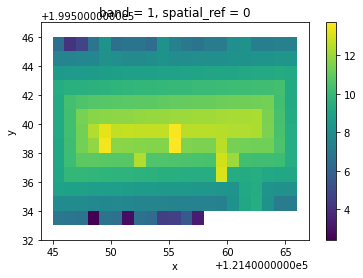

In [168]:
import rioxarray
import fiona
import rasterio
import rasterio.mask

xds = rioxarray.open_rasterio(dsm14, masked=True)
clippeddsm = xds.rio.clip([polygon_house], from_disk=True)
xdt = rioxarray.open_rasterio(dtm14, masked=True)
clippeddtm = xdt.rio.clip([polygon_house], from_disk=True)
chm = clippeddsm - clippeddtm
chm.plot()


In [172]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv

fig = go.Figure(data=[go.Surface(z=chm)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()